 <h1><center><font size="6">CNN with Tensorflow|Keras for Fashion MNIST</font></center></h1>


<center><img src="https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png" width="600"></img></center>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Class distribution</a>
    - <a href='#42'>Images samples</a>
- <a href='#5'>Model</a>  
    - <a href='#51'>Prepare the model</a>  
    - <a href='#52'>Train the model</a>  
    - <a href='#53'>Test prediction accuracy</a>   
    - <a href='#54'>Validation accuracy and loss</a>   
    - <a href='#55'>Add Dropout layers to the model</a>  
    - <a href='#56'>Re-train the model</a>   
    - <a href='#57'>Check validation accuracy and loss with the new model</a>    
    - <a href='#58'>Prediction accuracy with the new model </a>   
- <a href='#6'>Visualize the classified images</a>  
    - <a href='#61'>Correctly classified images</a>   
    - <a href='#62'>Incorrectly classified images</a>   
- <a href='#7'>Conclusions</a>
- <a href='#8'>References</a>

# <a id="1">Introduction</a>  


## Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.   

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.   

The training and test data sets have 785 columns.   

The first column consists of the class labels (see above), and represents the article of clothing. 

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

# <a id="2">Load packages</a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import  SGD, Adam, Adagrad, Adadelta, Adamax
from keras.regularizers import l2
#Import important libraries
# import keras

from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate,add
from keras.layers import Activation,Add 
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# <a id="3">Read the data</a>

There are 10 different classes of images, as following: 

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate datasets.


using Kaggle API to download the data into Colab

In [ ]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

In [ ]:
! unzip fashionmnist.zip

In [ ]:
#reading the training and testing data
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

# <a id="4">Data exploration</a>

![](http://)The dimmension of the original  train,  test set are as following:

In [ ]:
#print the shape of data
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [ ]:
#checking for null values
train_data.isnull().values.any()

False

In [ ]:
#checking for duplicates values
train_data.duplicated().values.any()

True

In [ ]:
#drop the duplicated data
train_data=train_data.drop_duplicates()

## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [ ]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Sandal              :   6000 or 10.007171806461297%
Bag                 :   6000 or 10.007171806461297%
Ankle Boot          :   5998 or 10.00383608252581%
T-shirt/top         :   5998 or 10.00383608252581%
Dress               :   5997 or 10.002168220558067%
Sneaker             :   5996 or 10.000500358590322%
Trouser             :   5996 or 10.000500358590322%
Coat                :   5995 or 9.99883249662258%
Shirt               :   5989 or 9.988825324816117%
Pullover            :   5988 or 9.987157462848375%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.    
Let's also plot the class distribution.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



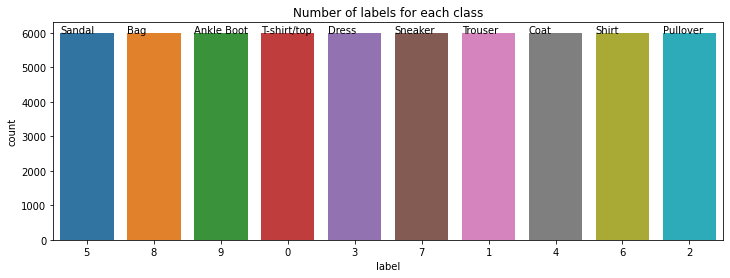

In [ ]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

### Test set images class distribution

In [ ]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).  

Lets' also plot the class distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



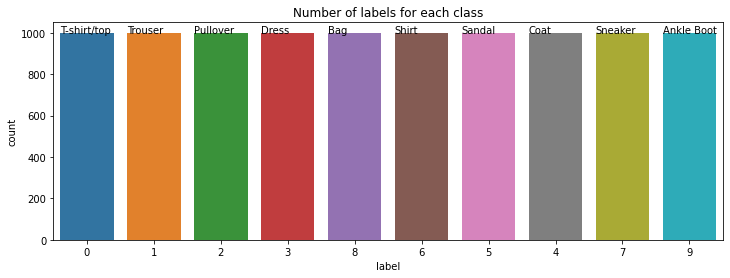

In [ ]:
plot_label_per_class(test_data)

## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [ ]:
#specify the dimention of images and the number of output classes
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot some of images and the labels are shown above each image.

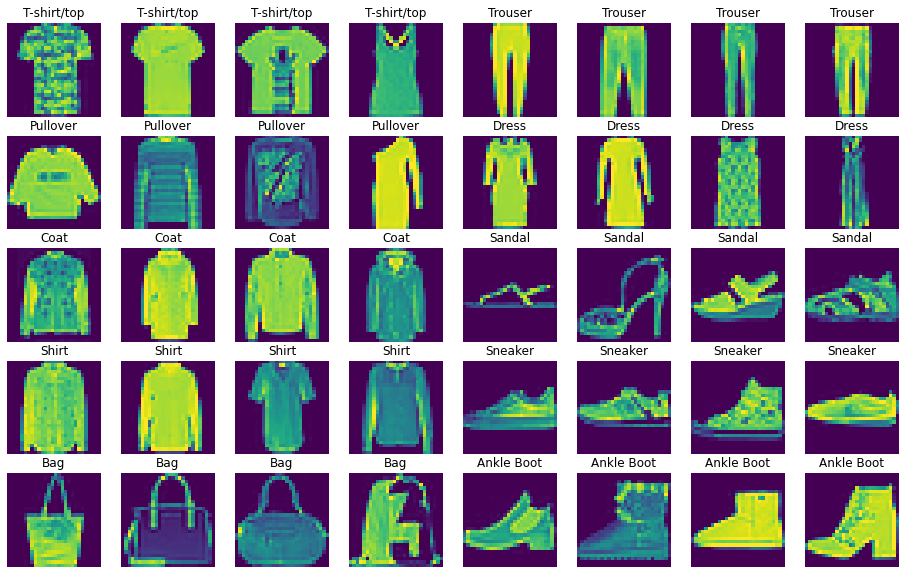

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels)

### Test set images

Let's plot now a selection of the test set images and their labels

Total number of sample images to plot:  40


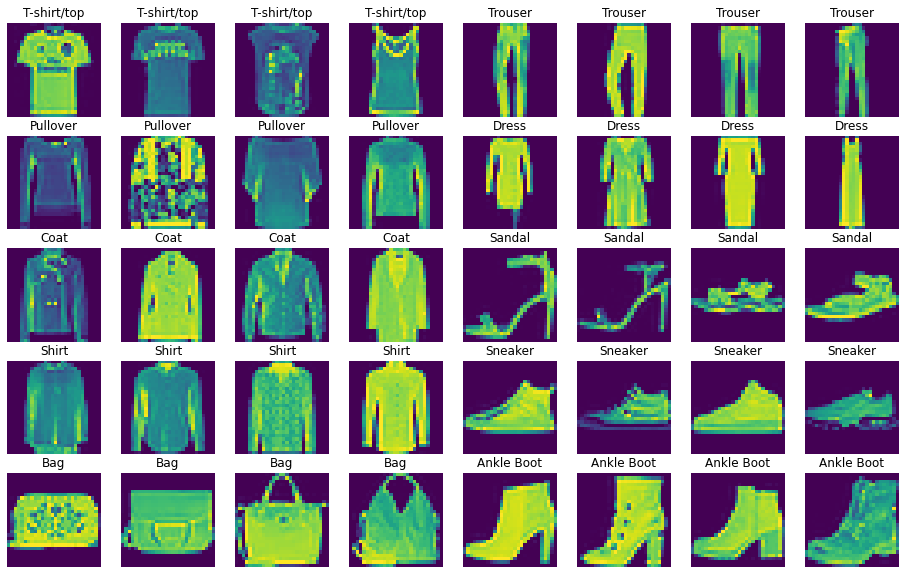

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

#correlation analysis

In [ ]:
%%time
df = pd.DataFrame(train_data)
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



CPU times: user 1min 26s, sys: 225 ms, total: 1min 26s
Wall time: 1min 27s


# <a id="51">Prepare the model</a>

# Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the columns  from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [ ]:
# data preprocessing
def data_preprocessing(raw):
    out_y =to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

We process both the train_data and the test_data

In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

The dimmension of the processed train and test set

In [ ]:
print("Fashion MNIST train -  rows:",X.shape[0]," columns:", X.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])
print("Fashion MNIST test -  rows:",y_test.shape[0]," columns:", y_test.shape[1:4])

Fashion MNIST train -  rows: 59957  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (10,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



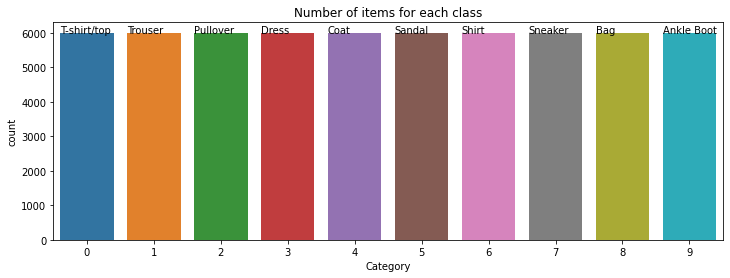

Sandal              :   6000 or 10.007171806461297%
Bag                 :   6000 or 10.007171806461297%
Ankle Boot          :   5998 or 10.00383608252581%
T-shirt/top         :   5998 or 10.00383608252581%
Dress               :   5997 or 10.002168220558067%
Sneaker             :   5996 or 10.000500358590322%
Trouser             :   5996 or 10.000500358590322%
Coat                :   5995 or 9.99883249662258%
Shirt               :   5989 or 9.988825324816117%
Pullover            :   5988 or 9.987157462848375%


In [ ]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")
    
    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
        
    plt.show()  

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))
    
plot_count_per_class(np.argmax(y,axis=1))
get_count_per_class(np.argmax(y,axis=1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



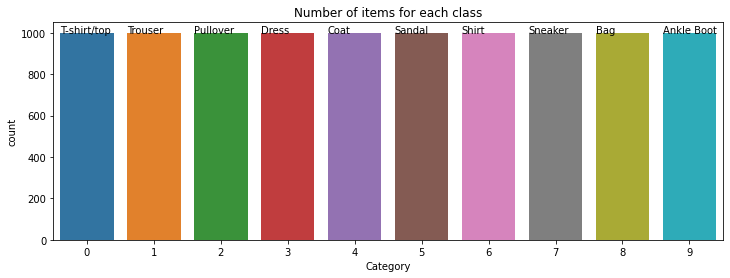

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


In [ ]:
plot_count_per_class(np.argmax(y_test,axis=1))
get_count_per_class(np.argmax(y_test,axis=1))

#Build The Models

##Virtualization Method

In [ ]:
def results_virt(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('Model Results')
  
  #first plot
  # first we display the training accuracy in red color VS. the validation accuracy in blue color through the epochs
  ax1.plot(history.history['accuracy'], 'r')
  ax1.plot(history.history['val_accuracy'], 'b')
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()

  #second plot
  # on this axis, we plot the training loss in red color VS. the validation loss in blue color through the epochs
  ax2.plot(history.history['loss'], 'r')
  ax2.plot(history.history['val_loss'], 'b')
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_loss', 'val_loss'])
  ax2.grid()

# display the figure
  plt.show() 

##Trial_1 Build the LeNet-5 model, without K-Fold cross validation

in this trial we will use only the lenet-5 architecture without using K-Fold cross validation 

In [ ]:
#build the letNet-5 model architecture
model = tf.keras.Sequential()
model.add(Conv2D(6, (5,5), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(16, (5,5), padding='same', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10,  activation = 'softmax'))

In [ ]:
#We will create Adam Optimizer for training optimizer
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [ ]:
#compile the model with our adam optimizer and categorical_crossentropy loss function
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               9

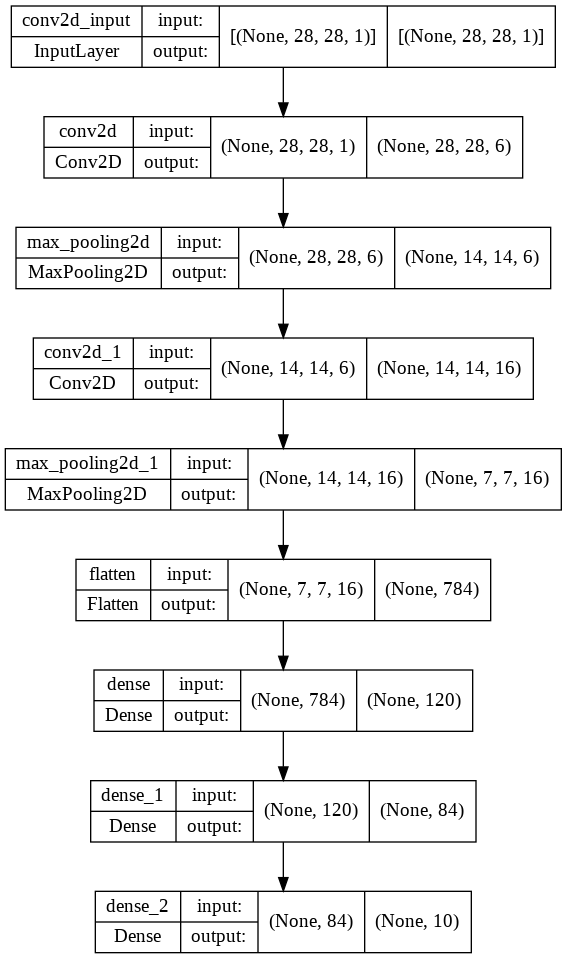

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#fit the model with 20 epochs and using early stopping and using 20% validation set
history = model.fit(X, y,
                    epochs=20,
                    batch_size = 32,
                    validation_split = 0.2,  
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    verbose = 1)

Epoch 1/20
1499/1499 [==============================] - 11s 6ms/step - loss: 0.5147 - accuracy: 0.8134 - val_loss: 0.3770 - val_accuracy: 0.8657
Epoch 2/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3438 - accuracy: 0.8748 - val_loss: 0.3295 - val_accuracy: 0.8778
Epoch 3/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2950 - accuracy: 0.8916 - val_loss: 0.3210 - val_accuracy: 0.8842
Epoch 4/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2664 - accuracy: 0.9017 - val_loss: 0.2785 - val_accuracy: 0.9012
Epoch 5/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2430 - accuracy: 0.9112 - val_loss: 0.3001 - val_accuracy: 0.8938
Epoch 6/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2196 - accuracy: 0.9186 - val_loss: 0.2869 - val_accuracy: 0.8990
Epoch 7/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2041 - accuracy: 0.9239 - val_loss: 0.2697 - val_accuracy

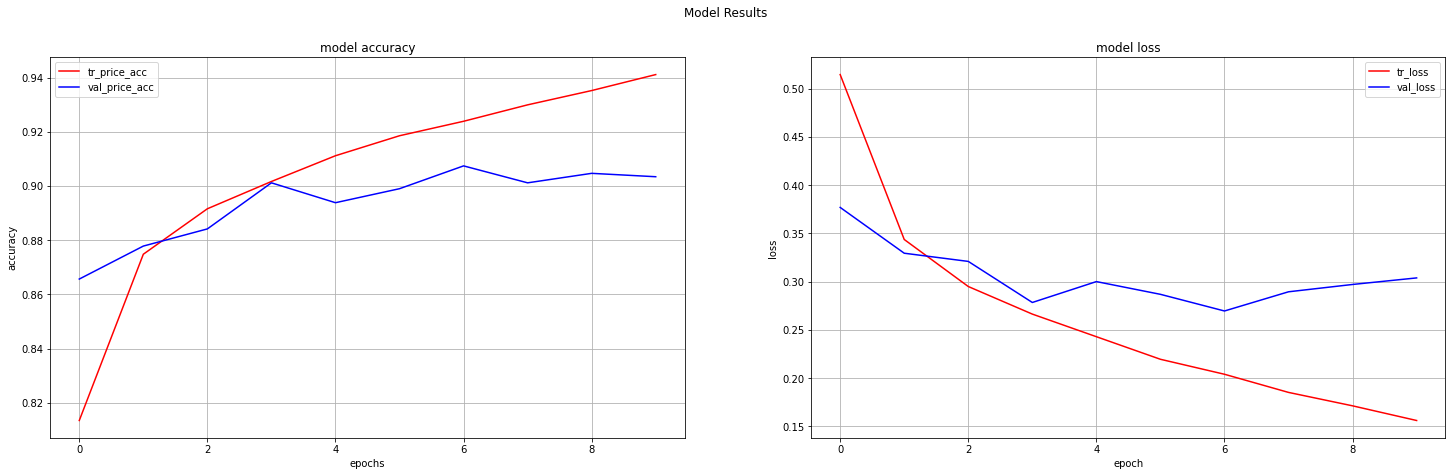

In [ ]:
#virtualization for losses and accuracy
results_virt(history)

In [ ]:
#Evaluate LeNet Model
print("Evaluate LeNet  Model")
model.evaluate(X_test,y_test)

Evaluate LeNet  Model
313/313 [==============================] - 1s 4ms/step - loss: 0.2703 - accuracy: 0.9060


[0.2703072726726532, 0.906000018119812]

##Trial_2 by using dropout, and without K-Fold cross validation

in this trial we will use only the lenet-5 architecture with some dropout layers and without using K-Fold cross validation

In [ ]:
#build the letNet-5 model architecture with using dropout
model_2 = tf.keras.Sequential()
model_2.add(Conv2D(6, (5,5), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
model_2.add(MaxPooling2D((2, 2), strides=2))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(16, (5,5), padding='same', activation = 'relu'))
model_2.add(MaxPooling2D((2, 2), strides=2))
model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(120, activation = 'relu'))
model_2.add(Dense(84, activation = 'relu'))
model_2.add(Dense(10,  activation = 'softmax'))

In [ ]:
#compile the model with our adam optimizer and categorical_crossentropy loss function
model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)         

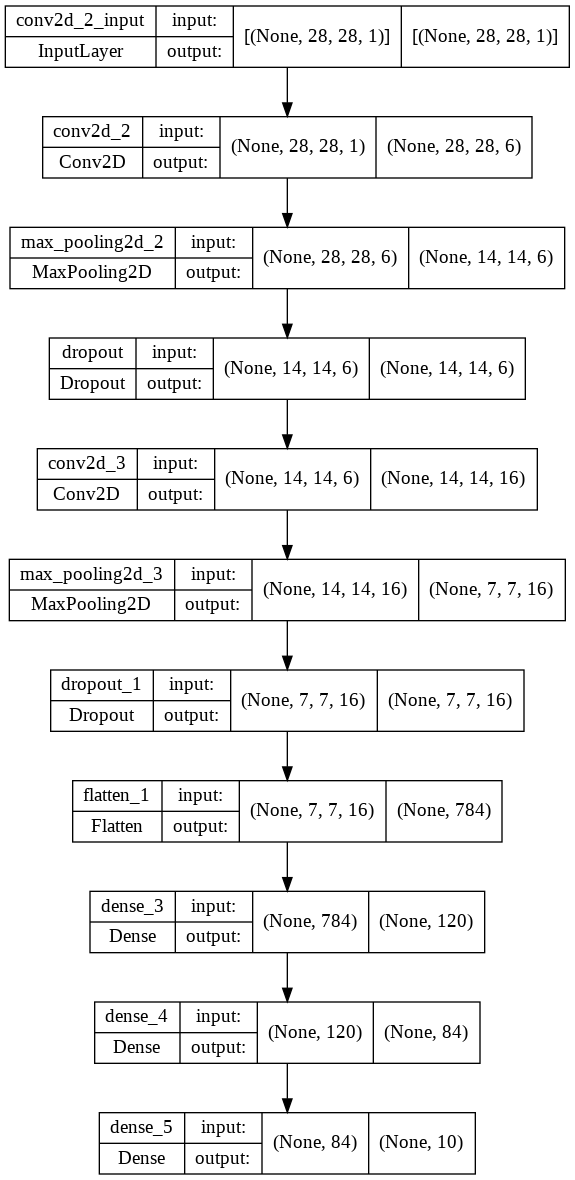

In [ ]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

In [ ]:
#fit the model with 20 epochs and using early stopping and using 20% validation set
history_2 = model_2.fit(X, y,
                    epochs=20,
                    batch_size = 32,
                    validation_split=0.2 , 
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
                    verbose = 1)

Epoch 1/20
1499/1499 [==============================] - 10s 6ms/step - loss: 0.5009 - accuracy: 0.8143 - val_loss: 0.3897 - val_accuracy: 0.8528
Epoch 2/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3658 - accuracy: 0.8631 - val_loss: 0.3218 - val_accuracy: 0.8849
Epoch 3/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3338 - accuracy: 0.8753 - val_loss: 0.2970 - val_accuracy: 0.8932
Epoch 4/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.3135 - accuracy: 0.8831 - val_loss: 0.2944 - val_accuracy: 0.8943
Epoch 5/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2985 - accuracy: 0.8889 - val_loss: 0.2855 - val_accuracy: 0.8947
Epoch 6/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2869 - accuracy: 0.8914 - val_loss: 0.2716 - val_accuracy: 0.8993
Epoch 7/20
1499/1499 [==============================] - 9s 6ms/step - loss: 0.2782 - accuracy: 0.8948 - val_loss: 0.2755 - val_accuracy

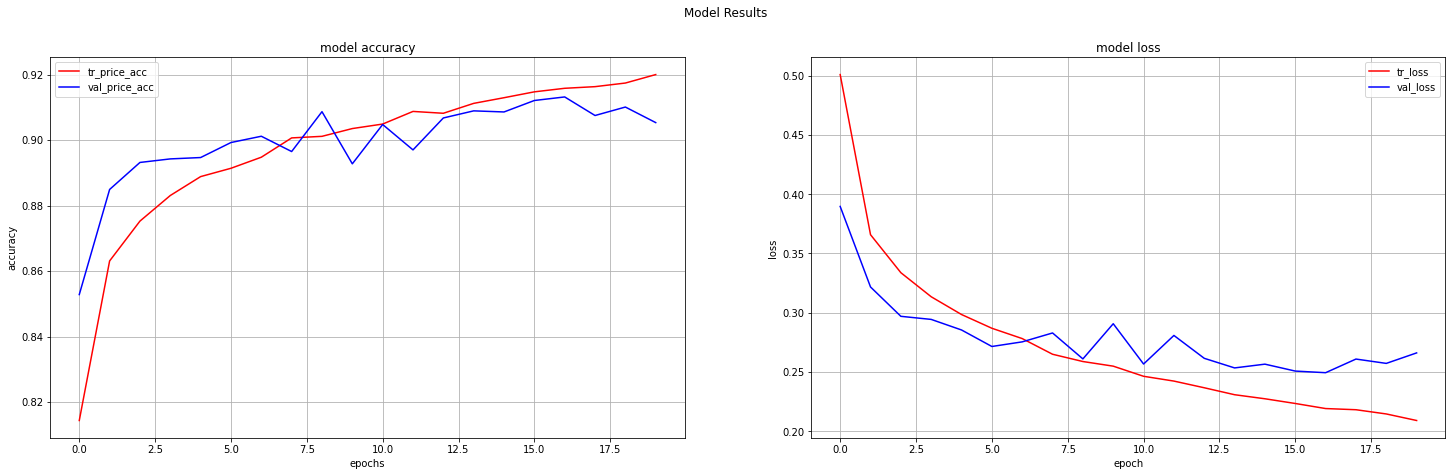

In [ ]:
#virtualization for losses and accuracy
results_virt(history_2)

In [ ]:
#Evaluate LeNet_Dropout Model
print("Evaluate LeNet_Dropout  Model")
model_2.evaluate(X_test,y_test)

Evaluate LeNet_Dropout  Model
313/313 [==============================] - 1s 4ms/step - loss: 0.2483 - accuracy: 0.9078


[0.2482645958662033, 0.907800018787384]

##Trial_3 Build the LeNet-5 model, with K-Fold cross validation

> in this trial we will use the lenet-5 architecture with using K-Fold cross validation

In [ ]:
#build the letNet-5 model architecture
model_3 = tf.keras.Sequential()
model_3.add(Conv2D(6, (5,5), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
model_3.add(MaxPooling2D((2, 2), strides=2))
model_3.add(Conv2D(16, (5,5), padding='same', activation = 'relu'))
model_3.add(MaxPooling2D((2, 2), strides=2))
model_3.add(Flatten())
model_3.add(Dense(120, activation = 'relu'))
model_3.add(Dense(84, activation = 'relu'))
model_3.add(Dense(10,  activation = 'softmax'))

In [ ]:
#We will create Adam Optimizer for training optimizer
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [ ]:
#compile the model with our adam optimizer and categorical_crossentropy loss function
model_3.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

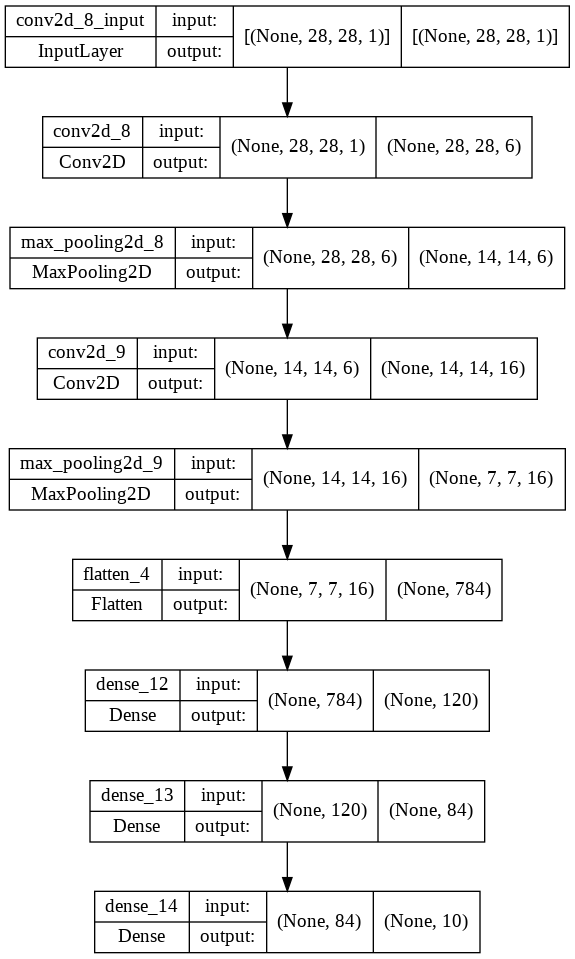

In [ ]:
tf.keras.utils.plot_model(model_3, show_shapes=True)

In [ ]:
#using 5-Folds cross validation
kfold = KFold(n_splits=5, shuffle = True, random_state=42)
estimator = KerasClassifier(build_fn=lambda:model_3, epochs=10, batch_size=32 ,verbose = 1)
results = cross_val_score(estimator, X, y, cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/10
1499/1499 [==============================] - 9s 5ms/step - loss: 0.4890 - accuracy: 0.8221
Epoch 2/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.3253 - accuracy: 0.8809
Epoch 3/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.2834 - accuracy: 0.8964
Epoch 4/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2529 - accuracy: 0.9071
Epoch 5/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2292 - accuracy: 0.9151
Epoch 6/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.2096 - accuracy: 0.9215
Epoch 7/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.1917 - accuracy: 0.9275
Epoch 8/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.1764 - accuracy: 0.9329
Epoch 9/10
1499/1499 [==============================] - 7s 5ms/step - loss: 0.1638 - accuracy: 0.9383
Epoch 10/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2820 

In [ ]:
#Evaluate LeNet Model
print("Evaluate LeNet  Model")
model_3.evaluate(X_test,y_test)

Evaluate LeNet  Model
313/313 [==============================] - 2s 6ms/step - loss: 0.6811 - accuracy: 0.9059


[0.6810760498046875, 0.9059000015258789]

##Trial_4 by using dropout, and K-Fold cross validation

> in this trial we will use the lenet-5 architecture with using dropout layers and using 5-Folds cross validation

In [ ]:
#build the letNet-5 model architecture
model_4 = tf.keras.Sequential()
model_4.add(Conv2D(6, (5,5), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
model_4.add(MaxPooling2D((2, 2), strides=2))
model_4.add(Dropout(0.2))
model_4.add(Conv2D(16, (5,5), padding='same', activation = 'relu'))
model_4.add(MaxPooling2D((2, 2), strides=2))
model_4.add(Dropout(0.2))
model_4.add(Flatten())
model_4.add(Dense(120, activation = 'relu'))
model_4.add(Dense(84, activation = 'relu'))
model_4.add(Dense(10,  activation = 'softmax'))

In [ ]:
#compile the model with our adam optimizer and categorical_crossentropy loss function
model_4.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 16)         

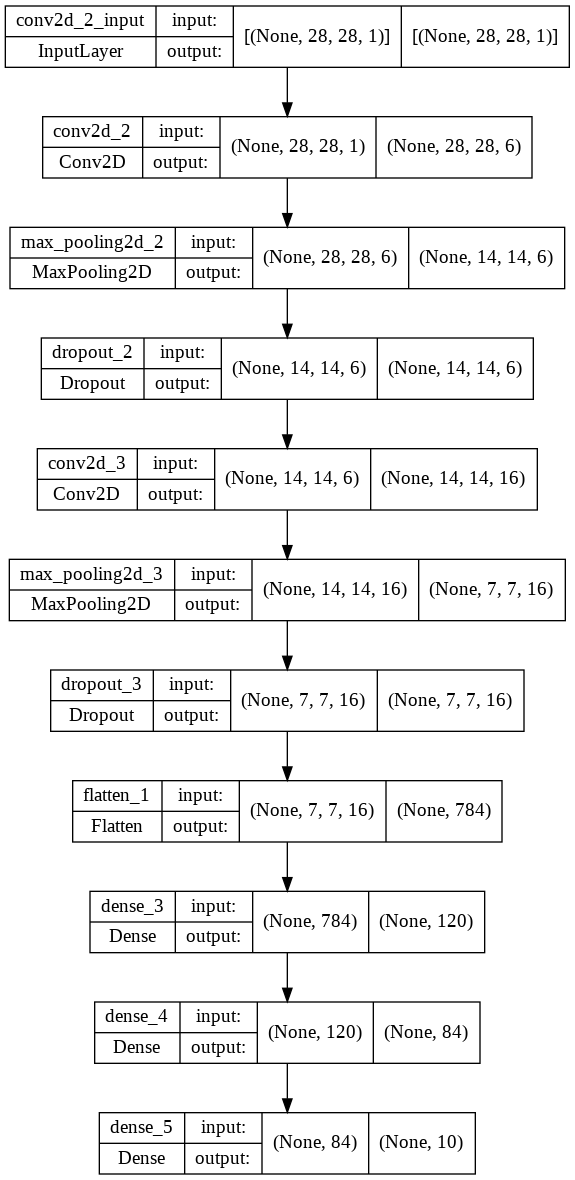

In [ ]:
tf.keras.utils.plot_model(model_4, show_shapes=True)

In [ ]:
#using 5-Folds cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
estimator = KerasClassifier(build_fn=lambda:model_4, epochs=10, batch_size=32 ,verbose = 1)
results_2 = cross_val_score(estimator, X, y, cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/10
1499/1499 [==============================] - 10s 5ms/step - loss: 0.5472 - accuracy: 0.8005
Epoch 2/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.3855 - accuracy: 0.8599
Epoch 3/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.3455 - accuracy: 0.8722
Epoch 4/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.3194 - accuracy: 0.8810
Epoch 5/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2975 - accuracy: 0.8888
Epoch 6/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2851 - accuracy: 0.8926
Epoch 7/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2745 - accuracy: 0.8964
Epoch 8/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2610 - accuracy: 0.9013
Epoch 9/10
1499/1499 [==============================] - 8s 5ms/step - loss: 0.2549 - accuracy: 0.9037
Epoch 10/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2519

In [ ]:
#Evaluate LeNet_Dropout Model
print("Evaluate LeNet_Dropout  Model")
model_4.evaluate(X_test,y_test)

Evaluate LeNet_Dropout  Model
313/313 [==============================] - 2s 4ms/step - loss: 0.2199 - accuracy: 0.9246


[0.2199123054742813, 0.9246000051498413]